<a href="https://colab.research.google.com/github/mwendar/Hypothesis-testing/blob/main/Week_4_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXPLORATORY DATA ANALYSIS

#* Hypothesis
 Are blue cars hired/taken more during the weekdays or the weekends?

 Hypothesis testing is the systematic way of selecting samples from a group or population with the intention of making a detemination about the expected behaviour of the entire population


#Importing libraries

In [24]:
#importing pandas
import pandas as pd

#importing matplotlib
import matplotlib.pyplot as plt

#importing numpy
import numpy as np

#importing seaborn
import seaborn as sns
 
#importing folium
import folium

#importing dataframe
from pandas.core.frame import DataFrame

#Loading the dataset

In [25]:

df_1 = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(df_1, encoding = "latin1")

# previewing the first 15 lines of the dataframe

df.head(15)

,ï»¿Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


#previewing 15 lines of the tail

In [26]:

df.tail(15)

,ï»¿Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16070,95880,6/5/2018,1439,1,weekday,4,6,0,0,2,1,0,0
16071,95880,6/6/2018,1440,2,weekday,12,12,0,1,0,0,0,0
16072,95880,6/7/2018,1439,3,weekday,10,11,1,0,0,0,0,0
16073,95880,6/8/2018,1438,4,weekday,11,9,0,0,0,0,0,0
16074,95880,6/9/2018,1440,5,weekend,15,15,0,0,1,2,0,0
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0


#Information about the dataframe columns

#Column name                -          Explanation

Postal code                -           Postal code of the area(in Paris)

Date                       -           Date of the row aggregation

n_daily_data_points -    number of daily points that were available for aggregation that day

DayOfWeek  - Identifier of weekday (0:Monday- 6:Sunday)

Day_type  - weekday or weekend

blueCars_taken_sum  - Number of blue cars taken that date in that area

Bluecars_returned_sum  - Number of blue cars returned that date in that area

Utilib_taken_sum   -    Number of Utilib taken that date in that area

utilib_returned_sum  -  Number of Utilib returned that date in that area

Utilib_14_taken_sum   -   Number of Utilib 1.4 taken that date in that area

Utilib_14_returned_sum  -  Number of Utilib 1.4 returned that date in that area

Slots_freed_sum   -   Number of recharging slots released that date in that area 

Slots_taken_sum  -  Number of recharging slots taken that date in that area


#Getting more information about the dataframe

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ï»¿Postal code          16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


determining the shape of the dataset

In [28]:

df.shape

(16085, 13)

#viewing the columns

In [29]:
df.columns

Index(['ï»¿Postal code', 'date', 'n_daily_data_points', 'dayOfWeek',
       'day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
       'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum',
       'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

#Understanding the data types used in the dataset

In [30]:
df.dtypes

ï»¿Postal code             int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [31]:
df.tail()

,ï»¿Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


Finding empty values values in every column

In [32]:
df.isna().sum()

ï»¿Postal code            0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

The dataset does not have any values in all column

#Checking the unique items in every column


In [33]:
df.nunique()

ï»¿Postal code            104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

#Checking for duplicates

In [34]:
df.duplicated().sum()

0

There are no duplicates in the dataset

#Renaming postal code column 

In [35]:
df.rename ( columns = {'ï»¿postal_code': 'postal_code'}, inplace = True)

#uniformity by eliminating the empty spaces and changing the column titles to lowercase

In [36]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,ï»¿postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


#setting date as the index figure for easy refferal

In [37]:
df.set_index('date')

,ï»¿postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,,,,,
1/1/2018,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1/2/2018,75001,1438,1,weekday,98,94,1,1,8,8,23,22
1/3/2018,75001,1439,2,weekday,138,139,0,0,2,2,27,27
1/4/2018,75001,1320,3,weekday,104,104,2,2,9,8,25,21
1/5/2018,75001,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
6/15/2018,95880,1440,4,weekday,15,10,0,0,2,3,0,0
6/16/2018,95880,1440,5,weekend,19,19,0,0,2,1,0,0
6/17/2018,95880,1440,6,weekend,33,35,1,1,0,0,0,0


#Dropping unnecessary columns since we are only focusing on the blue car

In [38]:
df.drop(['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], axis = 1)

,ï»¿postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,0,0


#Checking outliers for te necessary columns

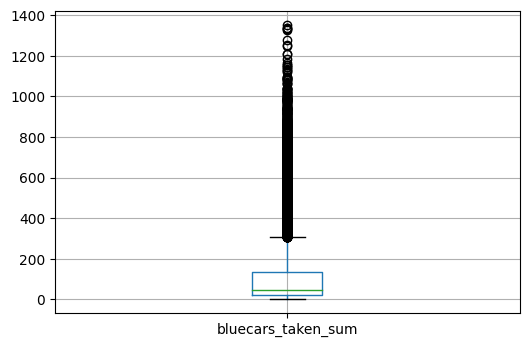

In [39]:
plt.figure(dpi=100)
df.boxplot(['bluecars_taken_sum'])



plt.show()


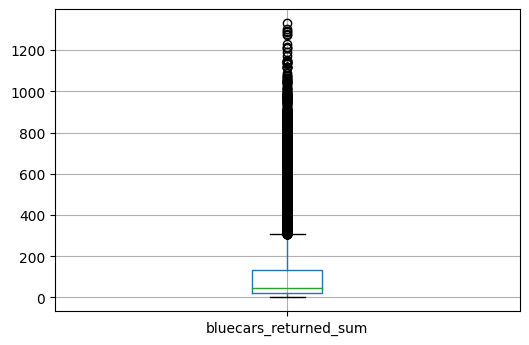

In [40]:
plt.figure(dpi=100)

df.boxplot(['bluecars_returned_sum'])

plt.show()

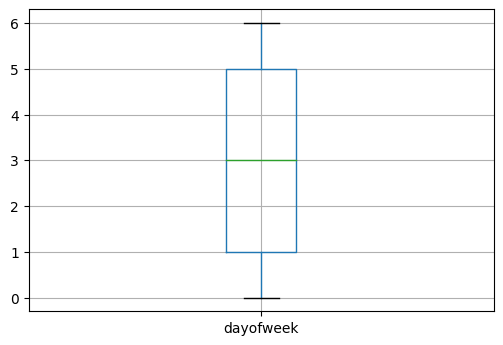

In [41]:
plt.figure(dpi=100)
df.boxplot(['dayofweek'])
plt.show()

There were no suspicious outliers in the columns that would lead to poor analysis so we leave the dataset as it is

##**Exploratory Data Analysis**

#Pie charts

Text(0.5, 1.0, 'Days of the week')

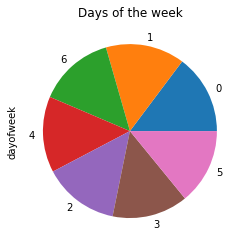

In [42]:
df.dayofweek.value_counts().plot(kind= 'pie')
plt.title('Days of the week')

Days of the week are denoted from 1 to 6 with monday being 0 and friday being 6.
From the set you can tell the days with their portions

Text(0.5, 1.0, 'Weekend/Weekday')

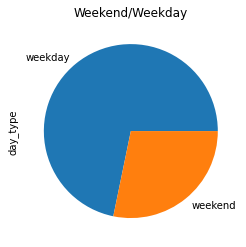

In [43]:
df.day_type.value_counts().plot(kind= 'pie')
plt.title('Weekend/Weekday')

#We can represent with a histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


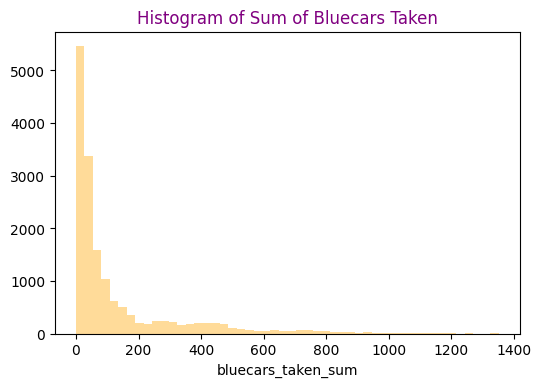

In [44]:

plt.figure(dpi = 100)
sns.distplot(df["bluecars_taken_sum"], kde = False, color = 'orange')
plt.title("Histogram of Sum of Bluecars Taken", color = 'purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


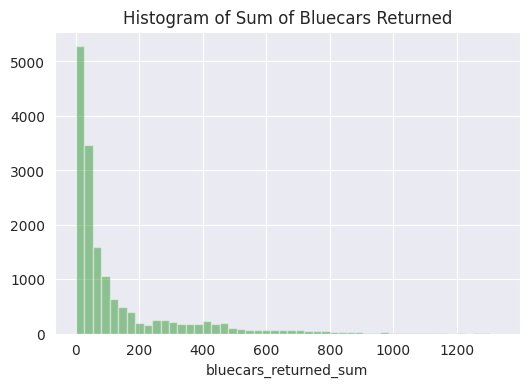

In [45]:

plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(df["bluecars_returned_sum"], kde = False, color = 'green')
plt.title("Histogram of Sum of Bluecars Returned")
plt.show()

#Scatter plot of bluecars returned and bluecars taken

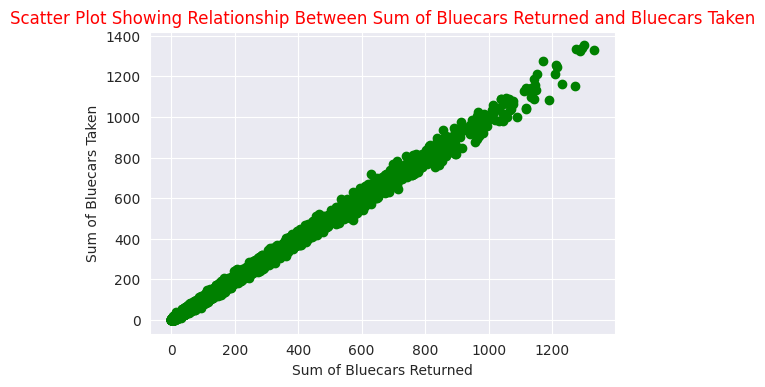

In [46]:

plt.figure(dpi=100)
plt.scatter(df['bluecars_returned_sum'], df['bluecars_taken_sum'], color='green')
plt.xlabel('Sum of Bluecars Returned')
plt.ylabel('Sum of Bluecars Taken')
plt.title('Scatter Plot Showing Relationship Between Sum of Bluecars Returned and Bluecars Taken', color='Red')
plt.show()

##Hypothesis Testing

What is the most popular day for returning cars?

In [47]:

df[df['bluecars_returned_sum']> 0].groupby('dayofweek')['dayofweek'].count().sort_values(ascending= False).head()

dayofweek
0    2370
1    2355
6    2272
4    2269
2    2267
Name: dayofweek, dtype: int64

Most cars are returne on Monday and the least on Wednesday





What is the most popular day for returning cars?

In [48]:
df[df['bluecars_taken_sum']> 0].groupby('dayofweek')['dayofweek'].count().sort_values(ascending= False).head()

dayofweek
0    2366
1    2348
6    2268
4    2265
2    2262
Name: dayofweek, dtype: int64

Most cars are taken on Monday and the least on Wednesday

In [49]:
df.describe()

,ï»¿postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# Stratified sample

In [50]:

df1 = df.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(df1['dayofweek'].value_counts())

# Check the stratified output
df1

0    237
1    236
2    227
3    227
4    227
5    227
6    227
Name: dayofweek, dtype: int64


,ï»¿postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
14316,94220,4/16/2018,1440,0,weekday,34,36,2,2,7,5,0,0
542,75004,3/19/2018,1440,0,weekday,147,152,1,2,7,7,45,46
11437,93310,4/16/2018,1440,0,weekday,11,10,1,2,0,0,0,0
6460,92230,3/12/2018,1440,0,weekday,50,38,1,1,3,3,1,1
1371,75009,5/7/2018,1437,0,weekday,321,294,10,9,21,22,69,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,94410,6/3/2018,1440,6,weekend,45,41,7,7,1,1,0,0
3763,78150,1/21/2018,1440,6,weekend,81,69,1,1,3,3,0,0
9742,92700,4/1/2018,1440,6,weekend,110,101,6,5,5,4,0,0
7356,92300,1/28/2018,1440,6,weekend,161,170,0,2,25,24,0,0


#Finding mean of bluecars taken stratified sample

In [51]:
round(df1['bluecars_taken_sum'].mean())

129

In [55]:
df['bluecars_taken_sum'].sum()

2025535

#Finding the mean of bluecars taken in the entire population

In [52]:

round(df['bluecars_taken_sum'].mean())

126

#The standard deviation of the population

In [53]:

round(df['bluecars_taken_sum'].std())

185

In [56]:
#Finding the z-score
zscore = (129-126)/(185/1423)
print(round(zscore, 5))

23.07568


In [57]:
from scipy import stats
from scipy.stats import norm
alpha = 0.05
prob = 1 - stats.norm.cdf(zscore)
print(round(prob, 3))
if(prob <  alpha):
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

0.0
We reject the null hypothesis
